# 从data_util_shallow.py的get_input方法中找灵感

In [27]:
source_filename='/disk3/zk/aboutoil/Shengli/data/4-training_data/shallow_methods/samples_GN_ts_False.pkl'

In [28]:
data=pd.read_pickle(source_filename)

In [37]:
data.keys()

dict_keys(['CD9', 'CB50', 'CB603', 'CB246', 'CB258', 'SHH2', 'CB259', 'SHHG1', 'CB45', 'CB604', 'CB248', 'SHH5', 'CB42', 'CB260', 'CB292', 'CB6', 'CB247', 'CB203', 'CB249', 'CB261', 'CB257', 'CB256', 'CB43', 'CB205', 'CB293', 'CB208', 'SHH202', 'CB241', 'CB243', 'SHH7', 'CB24', 'CB602', 'CB211', 'CB242', 'CB244', 'CB291', 'CB19', 'CB245', 'SHH3', 'SHH4', 'CB111', 'CB255', 'CB26', 'CB206', 'SHH6', 'CBG110', 'CB22', 'SHHG3', 'CB252', 'SHHG2', 'CB272', 'CB253', 'CB25', 'CB275', 'CBG11', 'CBG401', 'CB273', 'CB271', 'CBG406', 'CB813', 'CB251', 'CB27', 'CB23', 'CB802', 'CBG403', 'CBG10', 'CB807', 'CB818', 'SHH10', 'CB8', 'CBG4', 'CB812', 'CB809', 'CB808', 'SHH801', 'CB817', 'CB805', 'CB819', 'SHH8', 'CB810', 'CB806', 'CB329', 'CB84', 'CB803', 'CB81', 'CB330', 'CB30', 'CB804', 'CB324', 'CB325', 'CB301', 'CB38', 'CB328', 'CB321', 'CB326', 'CB40', 'CB341', 'CB327', 'CB322', 'CB32', 'CB323'])

In [39]:
data['CD9'],data['CD9'].shape

(array([[ 1.44801658,  1.46547821,  0.62320058, ...,  0.77099258,
          0.32981793,  0.        ],
        [ 1.3829219 ,  1.23216626,  0.62612381, ...,  0.75549438,
          0.35395351,  0.        ],
        [ 1.23137806,  0.18934122,  0.62222617, ...,  0.69108589,
          0.34944605,  0.        ],
        ...,
        [-0.16320179, -0.85224987,  0.62946509, ..., -0.43461351,
         -0.16088552,  0.        ],
        [-0.18178308, -0.8346935 ,  0.63568098, ..., -0.3020201 ,
         -0.08275693,  0.        ],
        [-0.24485171, -0.75458795,  0.63568098, ..., -0.25850336,
         -0.04858824,  0.        ]]), (799, 77))

In [38]:
data['CB50'].shape

(392, 77)

In [45]:
keys = list(data.keys())
index = np.random.permutation(len(keys))#打乱101口井
part = {'train':0.6, 'validation':0.2,'test':0.2}

In [50]:
index

array([ 56,  99,  34,  70,   2,  64,  79,  46,  35,  15,  63,  16,  61,
        88,  41,   4,  68,  17,  37,  87,  91,  13,  38,  10,  36,  69,
        77,   6,   8,  85,  73,  72,  30,  12,  22,  52,  97,  54,  18,
        39,  28,  31,  92,  57,  66,  86,  48,  43,  67,  78,  60,  11,
        19,  53,  21,  59,  42,  47,  49,  84,  62,  94,  45,  27,  74,
         1,  89,  58,   7,  98,  20, 100,  71,  44,  26,   0,  55,  33,
         9,  80,  51,  50,  24,   5,  82,  75,  14,  29,  23,  95,  81,
        96,  32,  25,  40,  83,  65,  76,  90,   3,  93])

In [49]:
index[:int(len(keys) * part['train'])]

array([56, 99, 34, 70,  2, 64, 79, 46, 35, 15, 63, 16, 61, 88, 41,  4, 68,
       17, 37, 87, 91, 13, 38, 10, 36, 69, 77,  6,  8, 85, 73, 72, 30, 12,
       22, 52, 97, 54, 18, 39, 28, 31, 92, 57, 66, 86, 48, 43, 67, 78, 60,
       11, 19, 53, 21, 59, 42, 47, 49, 84])

In [ ]:
train_key = [keys[i] for i in index[:int(len(keys) * part['train'])].tolist()]
train_key

In [ ]:
train_key = [keys[i] for i in index[:int(len(keys) * part['train'])].tolist()]
validation_key = [keys[i] for i in index[int(len(keys) * part['train']):
                                         int(len(keys) * (part['train'] + part['validation']))].tolist()]
test_key = [keys[i] for i in index[int(len(keys) * (part['train'] + part['validation'])):].tolist()]
train_data = get_part_data(data,train_key)
validation_data = get_part_data(data,validation_key)
test_data = get_part_data(data, test_key,return_samples=True)

也就是说，在/disk3/zk/aboutoil/Shengli/data/4-training_data/shallow_methods/samples_GN_ts_False.pkl中已经存储了完整的训练数据，因此，生成数据的关键在于怎么生成的samples_GN_ts_False.pkl文件

# deepmodel的训练数据

In [23]:
import pandas as pd
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from deepctr_torch.models import *
from deepctr_torch.inputs import SparseFeat, DenseFeat, get_feature_names
import torch

In [24]:
data1 = pd.read_pickle('./df_76d_full_50942.pkl')

In [ ]:
from easyeda import eda
dfeda=eda(data,language='Chinese')

In [ ]:
min(data1[72])

In [59]:
sparse_features = []
dense_features =[0,       1,       2,       3,       4,       5,       6,       7,
         8,       9,      10,      11,      12,      13,      14,      15,
        16,      17,      18,      19,      20,      21,      22,      23,
        24,      25,      26,      27,      28,      29,      30,      31,
        32,      33,      34,      35,      36,      37,      38,      39,
        40,      41,      42,      43,      44,      45,      46,      47,
        48,      49,      50,      51,      52,      53,      54,      55,
        56,      57,      58,      59,      60,      61,      62,      63,
        64,      65,      66,      67,      68,      69,      70,      71,
        72,      73,      74,      75,]
data[sparse_features] = data[sparse_features].fillna('-1', )
data[dense_features] = data[dense_features].fillna(0, )
target = ['label']

# 1.Label Encoding for sparse features,and do simple Transformation for dense features
for feat in sparse_features:
    lbe = LabelEncoder()
    data[feat] = lbe.fit_transform(data[feat])
mms = MinMaxScaler(feature_range=(0, 1))
data[dense_features] = mms.fit_transform(data[dense_features])

# 2.count #unique features for each sparse field,and record dense feature field name

fixlen_feature_columns = [SparseFeat(feat, data[feat].nunique())
                          for feat in sparse_features] + [DenseFeat(feat, 1,)
                                                          for feat in dense_features]

dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

feature_names = get_feature_names(
    linear_feature_columns + dnn_feature_columns)

# 3.generate input data for model

train, test = train_test_split(data, test_size=0.2)
train_model_input = {name:train[name] for name in feature_names}
test_model_input = {name:test[name] for name in feature_names}

# NG32

In [77]:
import numpy as np
import torch
import pandas as pd
# data = np.load("/disk3/zk/aboutoil/Shengli/data/plane_loc/plane_data_backup.npy")
# data = np.load("/disk3/zk/aboutoil/Shengli/data/plane_loc/plane_data.npy")
data=np.load('/disk3/Shengli/data/backup/plane_loc/plane_data.npy')
model_dfm_250epoch = torch.load('/disk3/zk/aboutoil/Shengli/deepmodel_zk/savedmodel/dfm_savedmodel_250epoch.pkl')


In [78]:
data = pd.DataFrame(data)

In [79]:
min(data[72])

-3.7669672566261295e+37

In [80]:
# data[0].value_counts(),"\n\n\n"

In [81]:
data[0].nunique()

1049035

In [82]:
### 预处理ng32层 转为字典
sparse_features = []
dense_features =[0,       1,       2,       3,       4,       5,       6,       7,
         8,       9,      10,      11,      12,      13,      14,      15,
        16,      17,      18,      19,      20,      21,      22,      23,
        24,      25,      26,      27,      28,      29,      30,      31,
        32,      33,      34,      35,      36,      37,      38,      39,
        40,      41,      42,      43,      44,      45,      46,      47,
        48,      49,      50,      51,      52,      53,      54,      55,
        56,      57,      58,      59,      60,      61,      62,      63,
        64,      65,      66,      67,      68,      69,      70,      71,
        72,      73,      74,      75,]
data[sparse_features] = data[sparse_features].fillna('-1', )
data[dense_features] = data[dense_features].fillna(0, )
# target = ['label']


In [ ]:
# import pandas as pd # 导入pandas库

# # 生成异常数据
# df = pd.DataFrame({'col1': [1, 120, 3, 5, 2, 12, 13],'col2':[12, 17, 31, 53, 22, 32, 43]})
# print (df) # 打印输出

# # 通过Z-Score方法判断异常值
# df_zscore = df.copy() # 复制一个用来存储Z-score得分的数据框
# cols = df.columns # 获得数据框的列名
# for col in cols: # 循环读取每列
#     df_col = df[col] # 得到每列的值
#     z_score = (df_col - df_col.mean()) / df_col.std() # 计算每列的Z-score得分
#     df_zscore[col] = z_score.abs() > 2.2 # 判断Z-score得分是否大于2.2，如果是则是True，否则为False
# print (df_zscore) # 打印输出

### 找到画图全相同的原因：每一列都有离群点，归到0-1后就全一样了

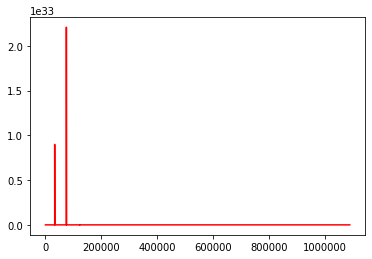

In [61]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.plot(data[0], 'r')

0 99分位的值:  2.4475315093994157
0 1分位的值:  -2.2316735529899594
1 99分位的值:  1.7566289734840406
1 1分位的值:  -2.189839723110199
2 99分位的值:  1.5795261716842668
2 1分位的值:  -2.6891798830032347
3 99分位的值:  1.8931985294818892
3 1分位的值:  -2.562591989040375
4 99分位的值:  1.95499311208725
4 1分位的值:  -2.456817626953125
5 99分位的值:  1.7853741025924692
5 1分位的值:  -2.1352126598358154
6 99分位的值:  2.0614253807067873
6 1分位的值:  -1.9159604144096374
7 99分位的值:  2.1510713624954256
7 1分位的值:  -1.801373929977417
8 99分位的值:  2.028680253028872
8 1分位的值:  -1.7117090272903444
9 99分位的值:  2.1308634138107303
9 1分位的值:  -1.993670687675476


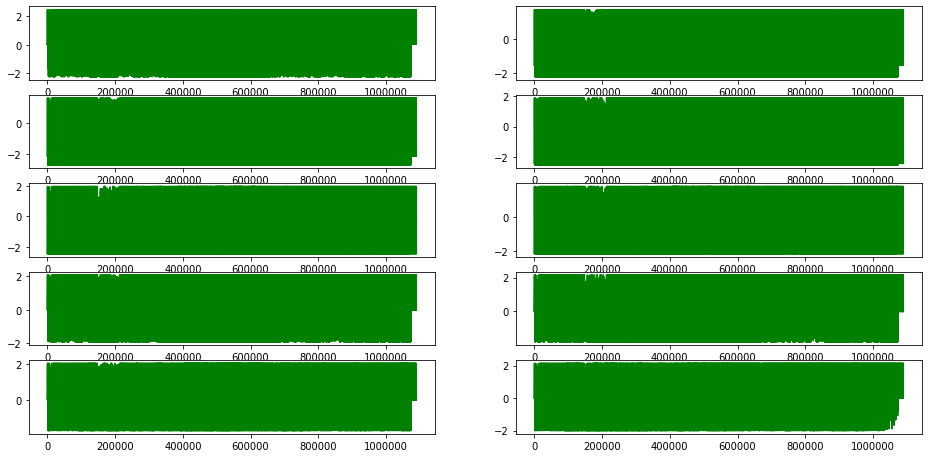

In [71]:
# 分位数去极值

import seaborn as sns
import numpy as np
fig = plt.figure(figsize=(16, 16))

for i in range(10):
    se = data[i].copy()
    # plt.plot(se, 'r')
    # print ("Series的值:" +  str(se))
    print (str(i)+" 99分位的值:  " + str(np.percentile(se, 99)))
    print (str(i)+" 1分位的值:  " + str(np.percentile(se, 1)))
    se[se>np.percentile(se, 99)] = np.percentile(se, 99)  #将极值赋值为分位点的值, 红色的是含有异常值的序列
    se[se<np.percentile(se, 1)] = np.percentile(se, 1)
    # print (se)
    plt.subplot(10,2,i+1)
    plt.plot(se, 'g')
plt.show()

0 99分位的值:  2.4475315093994157
0 1分位的值:  -2.2316735529899594
1089624
1 99分位的值:  1.7566289734840406
1 1分位的值:  -2.189839723110199
1089624
2 99分位的值:  1.5795261716842668
2 1分位的值:  -2.6891798830032347
1089624
3 99分位的值:  1.8931985294818892
3 1分位的值:  -2.562591989040375
1089624
4 99分位的值:  1.95499311208725
4 1分位的值:  -2.456817626953125
1089624
5 99分位的值:  1.7853741025924692
5 1分位的值:  -2.1352126598358154
1089624
6 99分位的值:  2.0614253807067873
6 1分位的值:  -1.9159604144096374
1089624
7 99分位的值:  2.1510713624954256
7 1分位的值:  -1.801373929977417
1089624
8 99分位的值:  2.028680253028872
8 1分位的值:  -1.7117090272903444
1089624
9 99分位的值:  2.1308634138107303
9 1分位的值:  -1.993670687675476
1089624


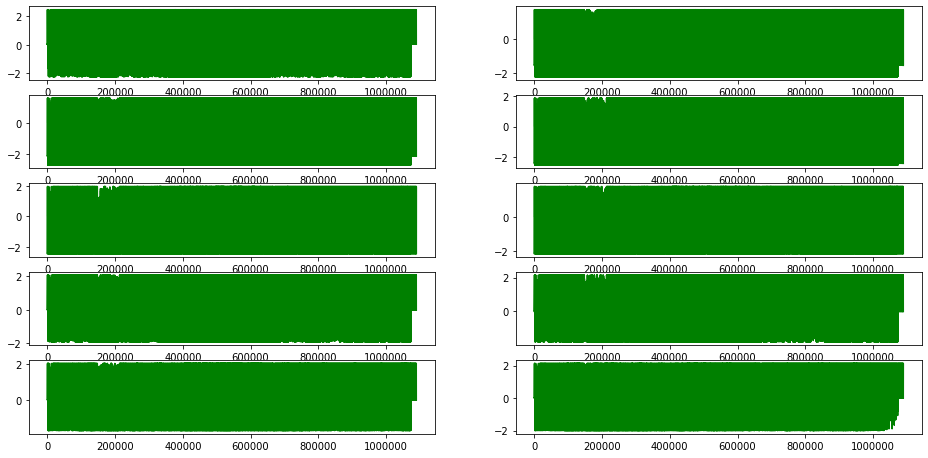

In [72]:
from scipy.stats import mstats

# winsorize双侧缩尾

import seaborn as sns
import numpy as np
fig = plt.figure(figsize=(16, 16))

for i in range(10):
    se = data[i].copy()
    # plt.plot(se, 'r')
    # print ("Series的值:" +  str(se))
    print (str(i)+" 99分位的值:  " + str(np.percentile(se, 99)))
    print (str(i)+" 1分位的值:  " + str(np.percentile(se, 1)))
    se = mstats.winsorize(se.values, limits=0.01)
    print (len(se))
    plt.subplot(10,2,i+1)
    plt.plot(se, 'g')
plt.show()


70 99分位的值:  1.5679988121986397
70 1分位的值:  -2.576481342315674
71 99分位的值:  1.5898902606964112
71 1分位的值:  -1.600495719909668
72 99分位的值:  2.287027192115784
72 1分位的值:  -1.936312198638916
73 99分位的值:  1.115896533727646
73 1分位的值:  -2.964664936065674
74 99分位的值:  1.30304605960846
74 1分位的值:  -2.498469114303589
75 99分位的值:  3.906355423927307
75 1分位的值:  -2.0797572135925293


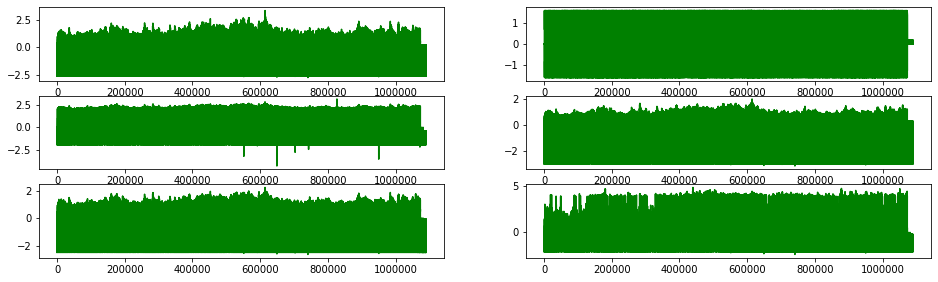

In [76]:
# 大于小于50的，取中位数

import seaborn as sns
import numpy as np
fig = plt.figure(figsize=(16, 16))

for i in range(70,76):
    se = data[i].copy()
    # plt.plot(se, 'r')
    # print ("Series的值:" +  str(se))
    print (str(i)+" 99分位的值:  " + str(np.percentile(se, 99)))
    print (str(i)+" 1分位的值:  " + str(np.percentile(se, 1)))
    se[se>5] = se.median()  #将极值赋值为分位点的值, 红色的是含有异常值的序列
    se[se<-5] = se.median()
    # print (se)
    plt.subplot(10,2,i-69)
    plt.plot(se, 'g')
plt.show()

0 99分位的值:  2.4475315093994157
0 1分位的值:  -2.2316735529899594
1089624
1 99分位的值:  1.7566289734840406
1 1分位的值:  -2.189839723110199
1089624
2 99分位的值:  1.5795261716842668
2 1分位的值:  -2.6891798830032347
1089624


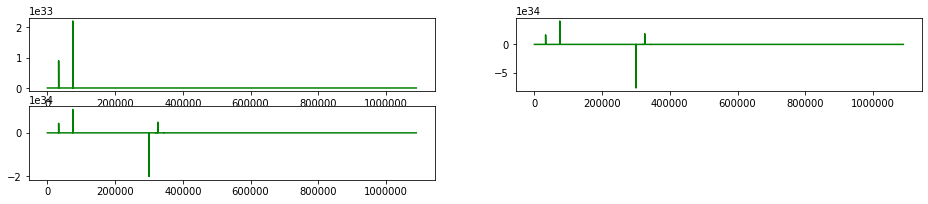

In [66]:
from scipy.stats import mstats

# 大于小于50的，取中位数

import seaborn as sns
import numpy as np
fig = plt.figure(figsize=(16, 16))

for i in range(3):
    se = data[i].copy()
    # plt.plot(se, 'r')
    # print ("Series的值:" +  str(se))
    print (str(i)+" 99分位的值:  " + str(np.percentile(se, 99)))
    print (str(i)+" 1分位的值:  " + str(np.percentile(se, 1)))
    se = se[~((se-se.mean()).abs()>3*se.std())]
    print (len(se))
    plt.subplot(10,2,i+1)
    plt.plot(se, 'g')
plt.show()

0 99分位的值:  2.4475315093994157
0 1分位的值:  -2.2316735529899594
1049509
1 99分位的值:  1.7566289734840406
1 1分位的值:  -2.189839723110199
822564
2 99分位的值:  1.5795261716842668
2 1分位的值:  -2.6891798830032347
851573


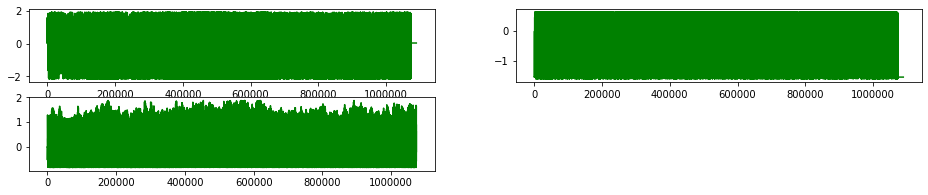

In [60]:
# 中位数去极值 #缺点 会删除元素

import seaborn as sns
import numpy as np
fig = plt.figure(figsize=(16, 16))

#代码来源：http://stackoverflow.com/questions/11686720/is-there-a-numpy-builtin-to-reject-outliers-from-a-list
def reject_outliers(data, m =3):
    """Here I have replace the mean with the more robust median and the standard deviation with the absolute distance to the median. 
      I then scaled the distances by their (again) median value so that m is on a reasonable relative scale."""
    d = np.abs(data - np.median(data))#与中位数之间的距离
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    
    return data[s<m]

for i in range(3):
    se = data[i].copy()
    print (str(i)+" 99分位的值:  " + str(np.percentile(se, 99)))
    print (str(i)+" 1分位的值:  " + str(np.percentile(se, 1)))
    # plt.plot(se, 'r')
    # print ("Series的值:" +  str(se))
    se = reject_outliers(se)
    print(len(se))
    # print (se)
    plt.subplot(10,2,i+1)
    plt.plot(se, 'g')
plt.show()

In [ ]:
# 分位数去极值

import seaborn as sns
import numpy as np

se = data[0]
# plt.plot(se, 'r')
# print ("Series的值:" +  str(se))
print ("5分位的值:  " + str(np.percentile(se, 90)))

se[se>np.percentile(se, 90)] = np.percentile(se, 90)  #将极值赋值为分位点的值, 红色的是含有异常值的序列
se[se<np.percentile(se, 10)] = np.percentile(se, 10)
# print (se)
plt.plot(se, 'g')

In [ ]:
#箱线图
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
 
# data = {
#     'China': [1000, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2500],
#     'America': [1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100],
#     'Britain': [1000, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000],
#     "Russia": [800, 1000, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]
# }
# df = pd.DataFrame(data)
 
# # df.plot.box(title="Consumer spending in each country", vert=False)
# data.plot.box(title="Consumer spending in each country")
 
# plt.grid(linestyle="--", alpha=0.3)
# plt.show()

In [ ]:
import pandas as pd # 导入pandas库


# 通过Z-Score方法判断异常值
df_zscore1 = data.copy() # 复制一个用来存储Z-score得分的数据框
cols = data.columns # 获得数据框的列名
for col in cols: # 循环读取每列
    df_col = data[col] # 得到每列的值
    z_score = (df_col - df_col.mean()) / df_col.std() # 计算每列的Z-score得分
    df_zscore1[col] = z_score.abs() > 2.2 # 判断Z-score得分是否大于2.2，如果是则是True，否则为False
df_zscore1 # 打印输出

### 去极值方法 end

In [83]:
for i in range(76):
    # plt.plot(se, 'r')
    # print ("Series的值:" +  str(se))
    print (str(i)+" 99分位的值:  " + str(np.percentile(se, 99)))
    print (str(i)+" 1分位的值:  " + str(np.percentile(se, 1)))
    data[i][data[i]>5] = data[i].median()  #将极值赋值为分位点的值, 红色的是含有异常值的序列
    data[i][data[i]<-5] = data[i].median()
    # print (se)
#     plt.subplot(10,2,i-69)
#     plt.plot(se, 'g')
# plt.show()

0 99分位的值:  2.715872163772583
0 1分位的值:  -2.0797572135925293
1 99分位的值:  2.715872163772583
1 1分位的值:  -2.0797572135925293
2 99分位的值:  2.715872163772583
2 1分位的值:  -2.0797572135925293
3 99分位的值:  2.715872163772583
3 1分位的值:  -2.0797572135925293
4 99分位的值:  2.715872163772583
4 1分位的值:  -2.0797572135925293
5 99分位的值:  2.715872163772583
5 1分位的值:  -2.0797572135925293
6 99分位的值:  2.715872163772583
6 1分位的值:  -2.0797572135925293
7 99分位的值:  2.715872163772583
7 1分位的值:  -2.0797572135925293
8 99分位的值:  2.715872163772583
8 1分位的值:  -2.0797572135925293
9 99分位的值:  2.715872163772583
9 1分位的值:  -2.0797572135925293
10 99分位的值:  2.715872163772583
10 1分位的值:  -2.0797572135925293
11 99分位的值:  2.715872163772583
11 1分位的值:  -2.0797572135925293
12 99分位的值:  2.715872163772583
12 1分位的值:  -2.0797572135925293
13 99分位的值:  2.715872163772583
13 1分位的值:  -2.0797572135925293
14 99分位的值:  2.715872163772583
14 1分位的值:  -2.0797572135925293
15 99分位的值:  2.715872163772583
15 1分位的值:  -2.0797572135925293
16 99分位的值:  2.715872163772583
16 1分位的值:  -2.

In [84]:
data

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.040565,-1.524327,-2.115448,-2.447500,-2.456818,-2.135213,-0.005849,-0.000045,0.000027,0.003279,...,-0.006767,-0.005131,0.006048,-2.510622,-2.576481,-0.009820,-1.936312,-2.964665,-2.498469,-2.079757
1,0.040565,-1.524327,-2.115448,-2.447500,-2.456818,-2.135213,-0.005849,-0.000045,0.000027,0.003279,...,-0.006767,-0.005131,0.006048,-2.510622,-2.576481,-0.009820,-1.936312,-2.964665,-2.498469,-2.079757
2,0.040565,-1.524327,-2.115448,-2.447500,-2.456818,-2.135213,-0.005849,-0.000045,0.000027,0.003279,...,-0.006767,-0.005131,0.006048,-2.510622,-2.576481,-0.009820,-1.936312,-2.964665,-2.498469,-2.079757
3,0.040565,-1.524327,-2.115448,-2.447500,-2.456818,-2.135213,-0.005849,-0.000045,0.000027,0.003279,...,-0.006767,-0.005131,0.006048,-2.510622,-2.576481,-0.009820,-1.936312,-2.964665,-2.498469,-2.079757
4,0.040565,-1.524327,-2.115448,-2.447500,-2.456818,-2.135213,-0.005849,-0.000045,0.000027,0.003279,...,-0.006767,-0.005131,0.006048,-2.510622,-2.576481,-0.009820,-1.936312,-2.964665,-2.498469,-2.079757
5,0.040565,-1.524327,-2.115448,-2.447500,-2.456818,-2.135213,-0.005849,-0.000045,0.000027,0.003279,...,-0.006767,-0.005131,0.006048,-2.510622,-2.576481,-0.009820,-1.936312,-2.964665,-2.498469,-2.079757
6,0.040565,-1.524327,-2.115448,-2.447500,-2.456818,-2.135213,-0.005849,-0.000045,0.000027,0.003279,...,-0.006767,-0.005131,0.006048,-2.510622,-2.576481,-0.009820,-1.936312,-2.964665,-2.498469,-2.079757
7,0.040565,-1.524327,-2.115448,-2.447500,-2.456818,-2.135213,-0.005849,-0.000045,0.000027,0.003279,...,-0.006767,-0.005131,0.006048,-2.510622,-2.576481,-0.009820,-1.936312,-2.964665,-2.498469,-2.079757
8,0.040565,-1.524327,-2.115448,-2.447500,-2.456818,-2.135213,-0.005849,-0.000045,0.000027,0.003279,...,-0.006767,-0.005131,0.006048,-2.510622,-2.576481,-0.009820,-1.936312,-2.964665,-2.498469,-2.079757
9,0.040565,-1.524327,-2.115448,-2.447500,-2.456818,-2.135213,-0.005849,-0.000045,0.000027,0.003279,...,-0.006767,-0.005131,0.006048,-2.510622,-2.576481,-0.009820,-1.936312,-2.964665,-2.498469,-2.079757


In [85]:

mms = MinMaxScaler(feature_range=(0, 1))
data[dense_features] = mms.fit_transform(data[dense_features])


In [86]:
data[75].nunique()

971781

In [87]:

fixlen_feature_columns = [SparseFeat(feat, data[feat].nunique())
                          for feat in sparse_features] + [DenseFeat(feat, 1,)
                                                          for feat in dense_features]

dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

feature_names = get_feature_names(
    linear_feature_columns + dnn_feature_columns)

# 3.generate input data for model

test_model_input = {name:data[name] for name in feature_names}

In [ ]:
# data

In [ ]:
# test_model_input.keys(),"\n",test_model_input.values()

In [89]:
pred_ng32 = model_dfm_250epoch.predict(test_model_input, 256)

In [92]:
pred_ng32 = np.reshape(pred_ng32, newshape=(1641,664))
np.save("./deepmodel_result/dcr_pic/ng32_dfm_250epoch.pkl", pred_ng32)

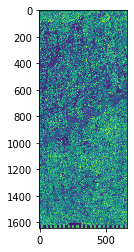

In [93]:
import matplotlib.pyplot as plt 
plane_filepath = "/disk3/zk/aboutoil/Shengli/data/plane_loc/ng32sz_grid_28jun_154436.p701"
filename = plane_filepath.split("/")[-1]
plt.imshow(pred_ng32)
plt.savefig("{}_dfm_250epoch.png".format(filename))

In [91]:
len(pred_ng32)

1089624

# 转为HD高清

In [ ]:
result = np.load("./deepmodel_result/dcr_pic/ng32_dfm_250epoch.pkl")

In [12]:
dfdata = pd.DataFrame(data)

In [ ]:
dfdata[1].value_counts()

In [26]:
data=np.load('/disk3/Shengli/data/plane_loc/plane_data.npy')
dfdata = pd.DataFrame(data)
data

-1.521615    1089624
Name: 1, dtype: int64

In [22]:
data=np.load('/disk3/Shengli/data/backup/plane_loc/plane_data.npy')
data

array([[ 4.0565096e-02, -1.5243267e+00, -2.1154478e+00, ...,
        -2.9646649e+00, -2.4984691e+00, -2.0797572e+00],
       [ 4.0565096e-02, -1.5243267e+00, -2.1154478e+00, ...,
        -2.9646649e+00, -2.4984691e+00, -2.0797572e+00],
       [ 4.0565096e-02, -1.5243267e+00, -2.1154478e+00, ...,
        -2.9646649e+00, -2.4984691e+00, -2.0797572e+00],
       ...,
       [ 4.0565096e-02, -1.5243267e+00, -2.1154478e+00, ...,
        -2.9646649e+00, -2.4984691e+00, -2.0797572e+00],
       [ 1.9122381e+09,  1.7305510e+12,  4.5407306e+11, ...,
         1.7152852e+07,  1.5443797e+07,  3.1347826e+07],
       [ 4.0565096e-02, -1.5243267e+00, -2.1154478e+00, ...,
        -2.9646649e+00, -2.4984691e+00, -2.0797572e+00]], dtype=float32)

In [23]:
data=np.load('/disk3/Shengli/Shengli_old/Shengli_update/project/data/plane_loc/plane_data.npy')
data

array([[ 4.0565096e-02, -1.5243267e+00, -2.1154478e+00, ...,
        -2.9646649e+00, -2.4984691e+00, -2.0797572e+00],
       [ 4.0565096e-02, -1.5243267e+00, -2.1154478e+00, ...,
        -2.9646649e+00, -2.4984691e+00, -2.0797572e+00],
       [ 4.0565096e-02, -1.5243267e+00, -2.1154478e+00, ...,
        -2.9646649e+00, -2.4984691e+00, -2.0797572e+00],
       ...,
       [ 4.0565096e-02, -1.5243267e+00, -2.1154478e+00, ...,
        -2.9646649e+00, -2.4984691e+00, -2.0797572e+00],
       [ 1.9122381e+09,  1.7305510e+12,  4.5407306e+11, ...,
         1.7152852e+07,  1.5443797e+07,  3.1347826e+07],
       [ 4.0565096e-02, -1.5243267e+00, -2.1154478e+00, ...,
        -2.9646649e+00, -2.4984691e+00, -2.0797572e+00]], dtype=float32)